- As project 2, I made functions at .py file, and then ,plot results in .ipynb file. 
- I condider Repeated First Price Auction(hereinafter called repeated FPA), not second price auction.
- Players in Repeated FPA must have algorithm whose regret coverges to 0. 

# Project 3: Repeated First Price Auction

## Information Setting: Full Information + Full Feedback

- Full Information: Each player knows their own value (v) which is fixed across all rounds
- Full Feedback: After each round, each player observes all bids from all players, not just their own outcome

This setting allows players to use opponent's bid history directly in their learning algorithms.

## Parameters

- n_rounds: 1000 - number of rounds per simulation
- k: 100 - number of discrete arms (discretization level)
- n_mc: 100 - number of Monte Carlo simulation runs
- h: scaling parameter (default: value) - used in Exponential Weight algorithms
- value (v): 10.0 - player's value for the item (default)
- learning_rate: sqrt(log(k) / n) - learning rate for Exponential Weight algorithms (default for flexible)
  Optimal learning rate: epsilon = sqrt(log(k) / T)
  Note: cumulative_payoffs are normalized by h, so epsilon does not need h factor
- delta: 0.95 - discount factor for long-term algorithm (default)
- observation_rounds: 20 - number of observation rounds for exploitation algorithm (default)

## Algorithms

1. 1_myopic: Myopic algorithm - maximizes current round expected utility
2. 2_long: Long-term algorithm - maximizes discounted long-term utility
3. 3_flexible: Flexible algorithm - Exponential Weight with learning_rate = np.sqrt(np.log(k) / n) (default, optimal)
4. 4_cool: Cool algorithm - always bids v/2
5. 5_feeling: Feeling algorithm - Exponential Weight over 5 strategy arms
6. 6_Exploitation: Exploitation algorithm - waits and exploits when opponent bids low

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import statistics

In [2]:
# collect algorithm
import importlib
import sys
from pathlib import Path

# Add algorithm directory to path (works in Jupyter notebooks)
algorithm_dir = Path('algorithm')
if str(algorithm_dir.resolve()) not in sys.path:
    sys.path.insert(0, str(algorithm_dir.resolve()))

# Import modules with numeric names using importlib and create aliases
myopic = importlib.import_module('1_myopic')
long = importlib.import_module('2_long')
flexible = importlib.import_module('3_flexible')
# Note: 4_random and 5_ftl are removed - they can be represented by flexible with different learning rates
# 4_random: random strategy (can be removed as it doesn't converge to 0 regret)
# 5_ftl: flexible with learning_rate = 100
cool = importlib.import_module('4_cool')
feeling = importlib.import_module('5_feeling')
exploitation = importlib.import_module('6_Exploitation')

# Import other modules
import two_repeatedFPA

# Part 1
- we simulate the game with players who use above algorithms (This is Part1). 

In [3]:
# Part 1 Implementation

# Parameters
n_rounds = 1000  # number of rounds
k = 10  # number of arms (discretization)
n_mc = 10  # number of Monte Carlo simulations


In [4]:
# Import simulation and plotting functions from two_repeatedFPA.py
from two_repeatedFPA import run_repeated_fpa, plot_part1_results

print("Part 1 simulation functions imported from two_repeatedFPA.py")

Part 1 simulation functions imported from two_repeatedFPA.py


MC iteration 10/10 completed
Completed: Myopic vs Flexible
Figure saved to: ../figures/myopic_vs_flexible.png


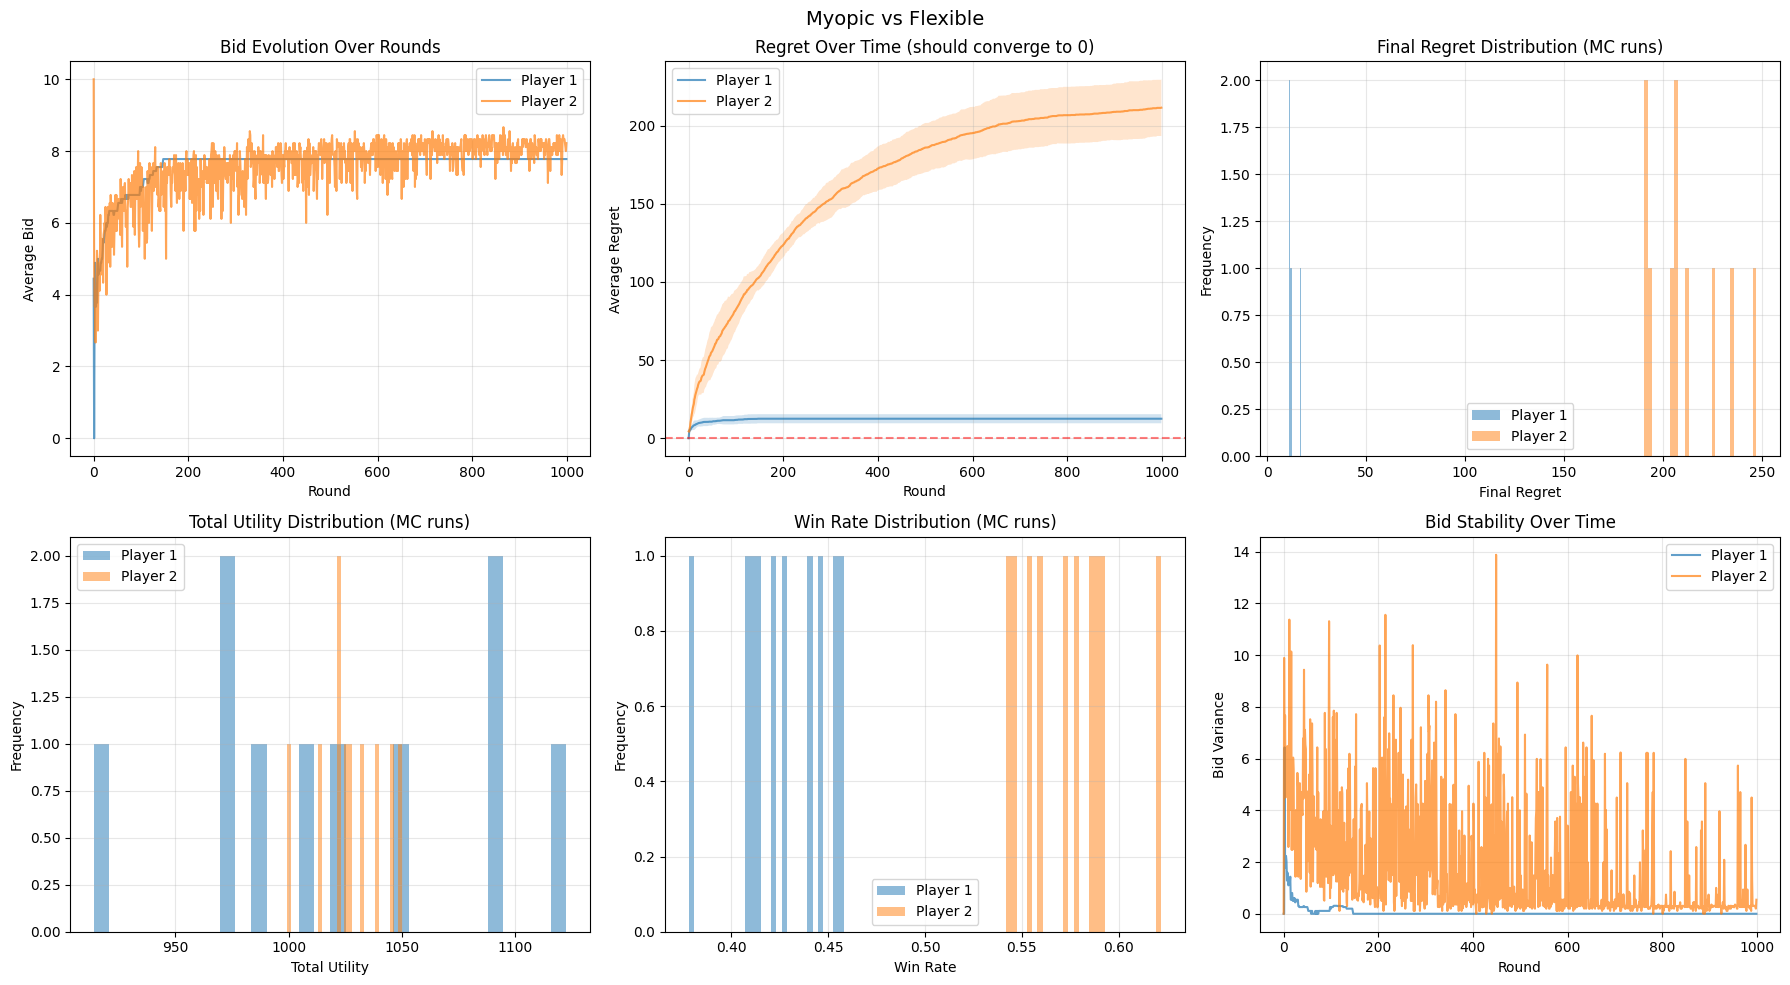


=== Summary Statistics ===
Player 1:
  Mean Regret: 12.50 ± 2.91
  Mean Utility: 1022.83 ± 62.02
  Mean Win Rate: 0.426 ± 0.023

Player 2:
  Mean Regret: 211.39 ± 18.18
  Mean Utility: 1027.72 ± 14.11
  Mean Win Rate: 0.574 ± 0.023


In [5]:
# Example 1: Myopic vs Flexible
# Note: flexible_algorithm uses optimal learning_rate = sqrt(log(k) / n) by default
# Optimal learning rate: epsilon = sqrt(log(k) / T)
v1, v2 = 10.0, 10.0
player1 = (myopic.myopic_algorithm, v1, {'k': k, 'h': v1})
# Use default learning rate (sqrt(log(k) / n)) - no need to specify explicitly
player2 = (flexible.flexible_algorithm, v2, {'k': k, 'h': v2})
# Alternative: explicitly specify learning_rate = np.sqrt(np.log(k) / n_rounds)
results_myopic_vs_flexible = run_repeated_fpa(player1, player2, n_rounds, n_mc, k=k)
print("Completed: Myopic vs Flexible")
plot_part1_results(results_myopic_vs_flexible, title="Myopic vs Flexible")

# Part 2
- Exploitative strategy vs 1_myopic (Myopic strategy)
- Exploitative strategy vs 2_long (Long-term strategy)
- Exploitative strategy vs 3_flexible (learning rate = h * sqrt(log(k) / n), optimal)
- Exploitative strategy v (Random strategy)
- Exploitative strategy vs (FTL, learning rate = 100)
- Exploitative strategy vs 4_cool (Cool strategy)
- Exploitative strategy vs 5_feeling (Feeling strategy)

In [9]:
# Part 2 Implementation

# Parameters
n_rounds = 30  # number of rounds
k = 100  # number of arms (discretization)
n_mc = 10  # number of Monte Carlo simulations

MC iteration 10/10 completed
Completed: Flexible vs Exploitation
Figure saved to: ../figures/flexible_vs_exploitation_(part_2).png


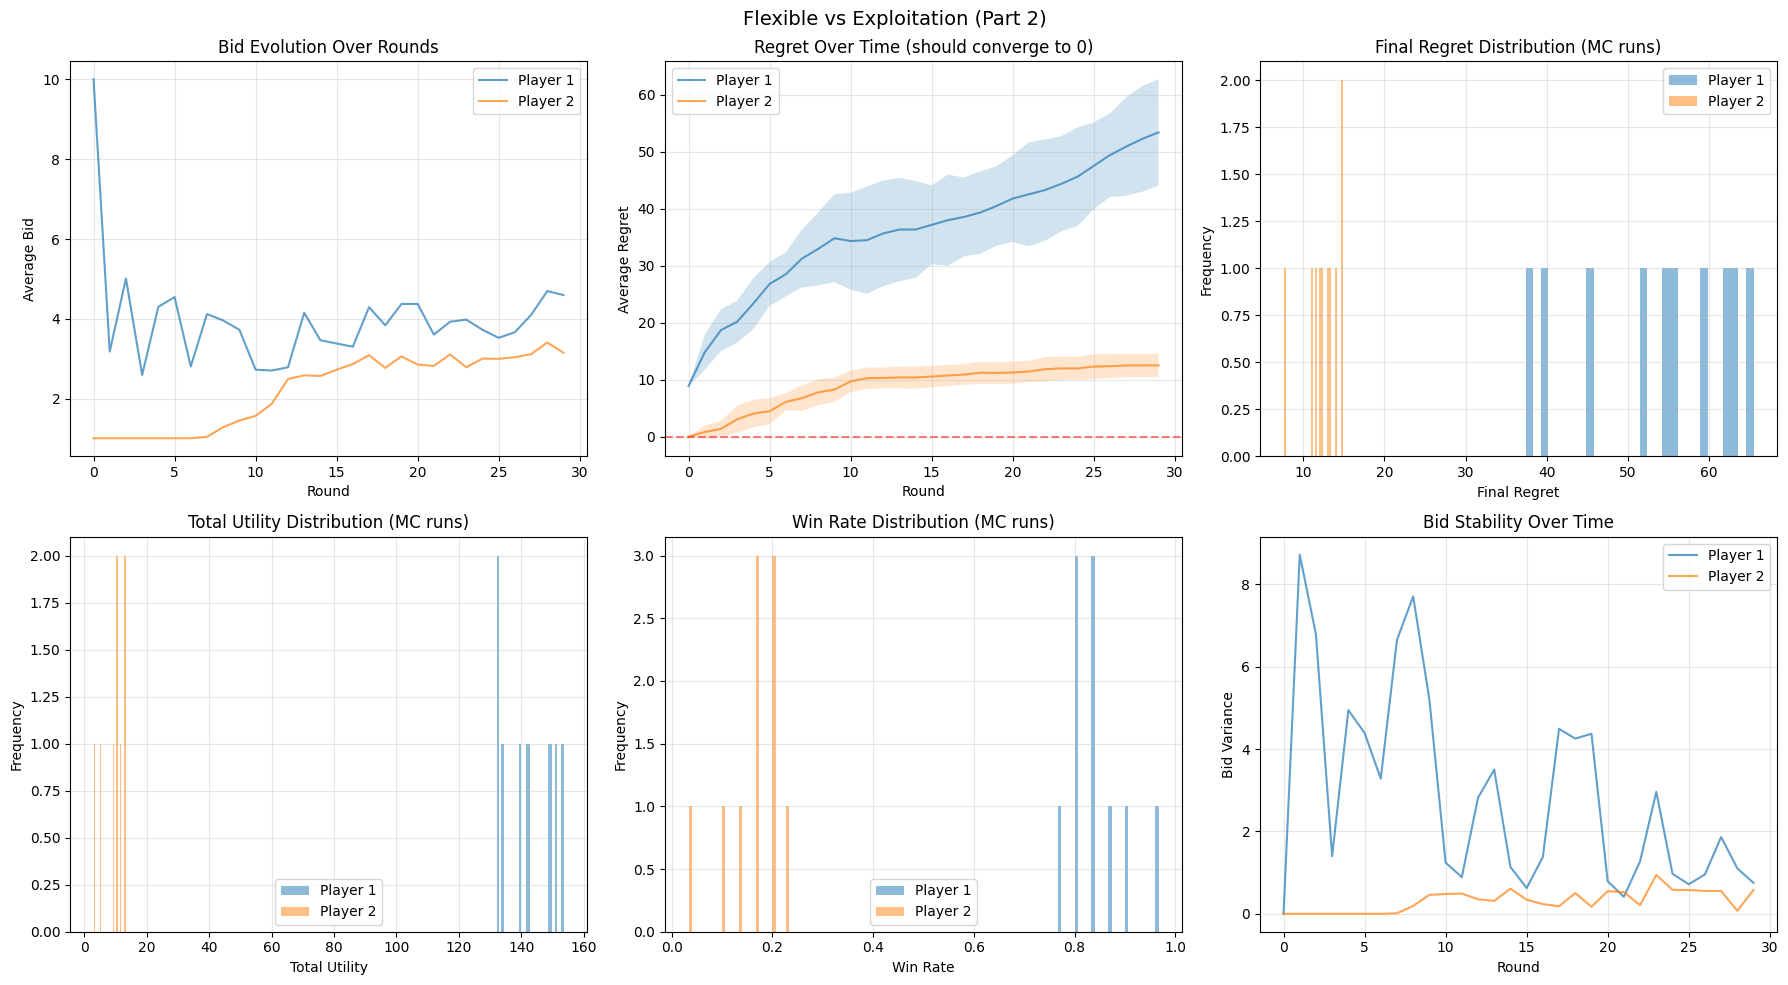


=== Summary Statistics ===
Player 1:
  Mean Regret: 53.42 ± 9.33
  Mean Utility: 142.64 ± 7.55
  Mean Win Rate: 0.840 ± 0.055

Player 2:
  Mean Regret: 12.51 ± 2.05
  Mean Utility: 10.31 ± 3.42
  Mean Win Rate: 0.160 ± 0.055


In [11]:
v1, v2 = 10.0, 5.0
# Use default learning rate (sqrt(log(k) / n)) - no need to specify explicitly
player1 = (flexible.flexible_algorithm, v1, {'k': k, 'h': v1})
player2 = (exploitation.exploitation_algorithm, v2, {'k': k, 'h': v2, 'observation_rounds': 5})
results_flexible_vs_exploitation = run_repeated_fpa(player1, player2, n_rounds, n_mc, k=k)
print("Completed: Flexible vs Exploitation")
plot_part1_results(results_flexible_vs_exploitation, title="Flexible vs Exploitation (Part 2)")